# 📘 Naïve Bayes Classifier: Income Classification

## 📌 Introduction
In this notebook, we will apply the **Naïve Bayes classifier** to the **Adult Income dataset**, which predicts whether a person earns more or less than $50K per year based on demographic and employment attributes.

We will:

✅ Explore the dataset 📊

✅ Preprocess the data 🔧

✅ Train and evaluate **Gaussian, Multinomial, and Bernoulli Naïve Bayes** models 🤖

✅ Compare their performance 📈

---


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
base_dir = os.path.abspath(os.path.join(os.getcwd(),"..", "..", "..", "data", "01_Supervised_Learning", "01_Regression"))
file_path = os.path.join(base_dir, "adult.csv")
df = pd.read_csv(file_path, header=None)
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for col in categorical_cols:
    # extract col with ? values
    filter_col = [x for x in df[col].unique() if '?' in x]
    if filter_col:
        print(f"Column {col} has values {filter_col[0]}, with {len(df[df[col]==filter_col[0]])} rows a %{len(df[df[col]==filter_col[0]])/df.shape[0]:.2f} of the total")
        # replace ? values with the mode
        df[col] = df[col].replace(filter_col[0], df[col].mode()[0])
    # comprobe if there are ? values
    print(df[col].unique(),'\n')

Column workclass has values  ?, with 1836 rows a %0.06 of the total
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Column occupation has values  ?, with 1843 rows a %0.06 of the total
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

[' Male' ' 

In [5]:
# encode the categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [6]:
# split the data
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.8098065308629337
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      7455
           1       0.69      0.36      0.47      2314

    accuracy                           0.81      9769
   macro avg       0.76      0.65      0.68      9769
weighted avg       0.79      0.81      0.79      9769



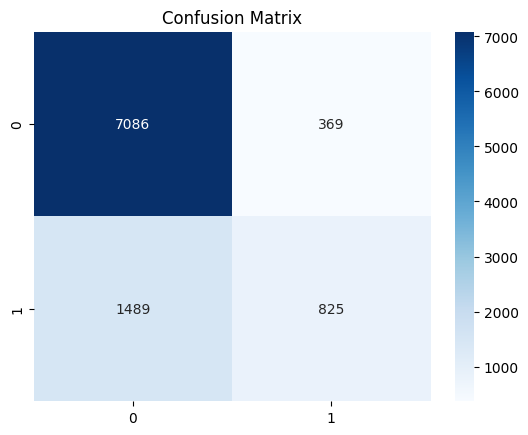

In [ ]:
## 🌍 Step 3: Train Naïve Bayes Models

### **Gaussian Naïve Bayes (For Continuous Data)**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# predict the test data
y_pred = gnb.predict(X_test_scaled)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7861603029992834
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      7455
           1       0.62      0.24      0.35      2314

    accuracy                           0.79      9769
   macro avg       0.71      0.60      0.61      9769
weighted avg       0.76      0.79      0.75      9769



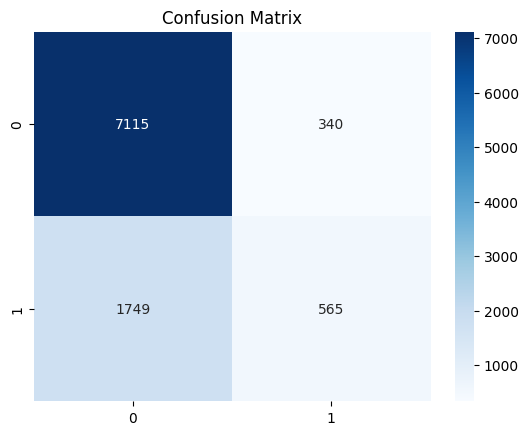

In [10]:
### **Multinomial Naïve Bayes (For Categorical/Frequency Data)**
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# predict the test data
y_pred_mnb = mnb.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Classification Report:\n", classification_report(y_test, y_pred_mnb))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.7334425222643055
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      7455
           1       0.46      0.73      0.56      2314

    accuracy                           0.73      9769
   macro avg       0.68      0.73      0.69      9769
weighted avg       0.79      0.73      0.75      9769



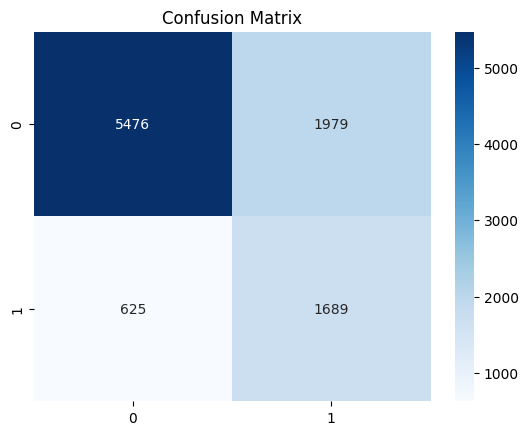

In [9]:
# BernoulliNB
X_train_bin = X_train.copy()
X_test_bin = X_test.copy()

# binarize the data
X_train_bin[X_test_bin > 0] = 1
X_test_bin[X_test_bin > 0] = 1

#train the model
bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)

# predict the test data
y_pred_bin = bnb.predict(X_test_bin)

print("Accuracy:", accuracy_score(y_test, y_pred_bin))
print("Classification Report:\n", classification_report(y_test, y_pred_bin))
sns.heatmap(confusion_matrix(y_test, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

C:\Users\berme\AppData\Local\Temp\ipykernel_18664\323441084.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette=['blue', 'green', 'red'])


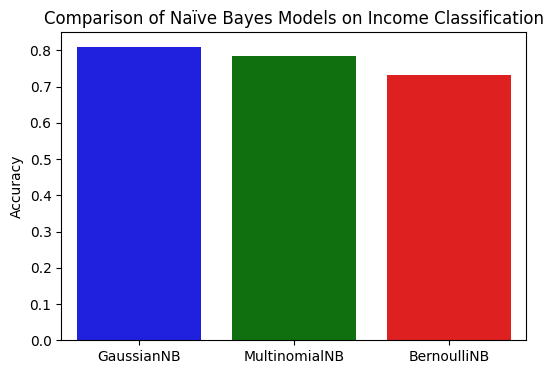

In [ ]:
## 📈 Step 4: Compare Performance
# Comparing Accuracy
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_mnb), accuracy_score(y_test, y_pred_bin)]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracy, palette=['blue', 'green', 'red'])
plt.ylabel("Accuracy")
plt.title("Comparison of Naïve Bayes Models on Income Classification")
plt.show()

## 📌 Conclusion
- **Gaussian Naïve Bayes** works well for continuous features but requires scaling.
- **Multinomial Naïve Bayes** is ideal for categorical features but assumes frequencies.
- **Bernoulli Naïve Bayes** is useful for binary features but may lose important data.

🚀 **Next Steps:** Experiment with hyperparameters and feature engineering to improve performance!
